In [1]:
#How has the NA region performed so far
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
worlds = pd.read_csv("2019worlds.csv")
worlds

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,1,Blue,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,2,Blue,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,3,Blue,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,4,Blue,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.28615,PI-RR,1,9.19,5,Blue,...,-1156,2731,2376,355,4,3,1,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1071731,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43758.47475,G,8.6,9.19,8,Red,...,-615,4203,4571,-368,78,71,7,128,106,22
1100,1071731,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43758.47475,G,8.6,9.19,9,Red,...,-127,3383,3607,-224,93,97,-4,148,145,3
1101,1071731,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43758.47475,G,8.6,9.19,10,Red,...,188,2853,2268,585,15,16,-1,23,24,-1
1102,1071731,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43758.47475,G,8.6,9.19,100,Blue,...,2841,18918,19064,-146,335,321,14,507,490,17


In [6]:
worlds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 98 columns):
gameid                     1104 non-null int64
url                        1104 non-null object
league                     1104 non-null object
split                      1104 non-null object
date                       1104 non-null float64
week                       1104 non-null object
game                       1104 non-null object
patchno                    1104 non-null float64
playerid                   1104 non-null int64
side                       1104 non-null object
position                   1104 non-null object
player                     1104 non-null object
team                       1104 non-null object
champion                   1104 non-null object
ban1                       1104 non-null object
ban2                       1104 non-null object
ban3                       1104 non-null object
ban4                       1104 non-null object
ban5                       10

In [5]:
NA = worlds[(worlds.team.isin(['Clutch Gaming','Team Liquid', 'Cloud9'])) & (worlds.week == 'G')]
LCK = worlds[(worlds.team.isin(['Damwon Gaming','SK Telecom T1', 'Griffin'])) & (worlds.week == 'G')]
LEC = worlds[(worlds.team.isin(['G2 Esports','Splyce', 'Fnatic'])) & (worlds.week == 'G')]
LPL = worlds[(worlds.team.isin(['Royal Never Give Up','Invictus Gaming', 'FunPlus Phoenix'])) & (worlds.week == 'G')]


In [5]:
NA.info()
NA.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 521 to 1103
Data columns (total 98 columns):
gameid                     108 non-null int64
url                        108 non-null object
league                     108 non-null object
split                      108 non-null object
date                       108 non-null float64
week                       108 non-null object
game                       108 non-null object
patchno                    108 non-null float64
playerid                   108 non-null int64
side                       108 non-null object
position                   108 non-null object
player                     108 non-null object
team                       108 non-null object
champion                   108 non-null object
ban1                       108 non-null object
ban2                       108 non-null object
ban3                       108 non-null object
ban4                       108 non-null object
ban5                       102 non-null object

,gameid,date,patchno,playerid,gamelength,result,k,d,a,teamkills,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
count,1.080000e+02,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.068644e+06,43754.626666,9.190000e+00,29.583333,33.400926,0.277778,3.500000,5.814815,7.574074,10.50000,...,-357.259259,6147.370370,6237.203704,-89.833333,102.592593,105.907407,-3.314815,158.074074,164.648148,-6.574074
std,4.689134e+03,2.945533,1.784638e-15,57.919236,7.468827,0.449991,4.429088,5.970564,9.805781,6.29419,...,1524.354059,5583.886726,5661.465181,638.570168,96.587188,99.693974,17.250571,148.487370,154.606604,23.792799
min,1.061019e+06,43750.331150,9.190000e+00,1.000000,23.916667,0.000000,0.000000,0.000000,0.000000,1.00000,...,-7158.000000,2389.000000,2268.000000,-2849.000000,1.000000,0.000000,-61.000000,2.000000,2.000000,-97.000000
25%,1.061221e+06,43751.490050,9.190000e+00,3.750000,27.933333,0.000000,1.000000,2.000000,2.000000,5.00000,...,-994.750000,3232.000000,3232.000000,-266.250000,57.250000,59.000000,-10.250000,83.250000,85.000000,-18.000000
50%,1.071468e+06,43754.900860,9.190000e+00,6.500000,31.666667,0.000000,2.000000,4.000000,4.000000,11.00000,...,-73.500000,3796.500000,3814.500000,14.000000,77.500000,79.000000,-3.000000,115.000000,121.500000,-3.500000
75%,1.071659e+06,43757.412370,9.190000e+00,9.250000,39.066667,1.000000,4.000000,6.000000,10.000000,15.00000,...,534.250000,4731.750000,4743.000000,268.250000,91.000000,94.250000,4.000000,142.250000,147.250000,8.000000
max,1.071731e+06,43758.474750,9.190000e+00,200.000000,48.650000,1.000000,25.000000,26.000000,54.000000,25.00000,...,2964.000000,19573.000000,19581.000000,1600.000000,352.000000,355.000000,52.000000,541.000000,530.000000,50.000000


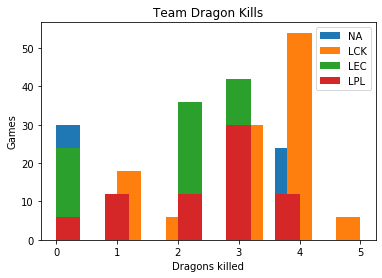

In [6]:
NAobjectives = NA[['result','teamdragkills','teambaronkills','teamtowerkills']]
LCKobjectives = LCK[['result','teamdragkills','teambaronkills','teamtowerkills']]
LECobjectives = LEC[['result','teamdragkills','teambaronkills','teamtowerkills']]
LPLobjectives = LPL[['result','teamdragkills','teambaronkills','teamtowerkills']]
plt.hist((NAobjectives['teamdragkills']), label="NA")
plt.hist((LCKobjectives['teamdragkills']), label="LCK")
plt.hist((LECobjectives['teamdragkills']), label="LEC")
plt.hist((LPLobjectives['teamdragkills']), label="LPL")
plt.title("Team Dragon Kills", loc='center')
plt.xlabel('Dragons killed')
plt.ylabel('Games')
plt.legend()


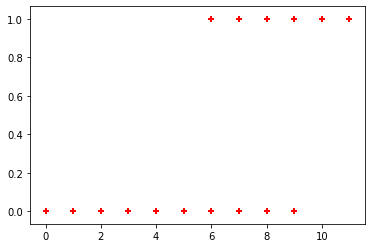

In [7]:
plt.scatter(worlds['teamtowerkills'], worlds['result'], marker='+', color='red')

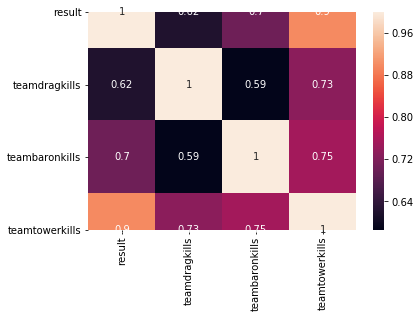

,result,teamdragkills,teambaronkills,teamtowerkills
result,1.000000,0.621620,0.703769,0.899776
teamdragkills,0.621620,1.000000,0.586565,0.730708
teambaronkills,0.703769,0.586565,1.000000,0.754155
teamtowerkills,0.899776,0.730708,0.754155,1.000000


In [8]:
import seaborn as sb
worldsObjectives = worlds[['result','teamdragkills','teambaronkills','teamtowerkills']]

sb.heatmap(worldsObjectives.corr(), annot=True)
plt.show()
worldsObjectives.corr()

In [9]:
import statsmodels.api as sm
worldsObjectives['intercept']=1.0
ind_cols=['teamdragkills','teambaronkills','teamtowerkills']
logit = sm.Logit(worldsObjectives['result'],worldsObjectives[ind_cols])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.504105
         Iterations 6


C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 1104
Model:                          Logit   Df Residuals:                     1101
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:                  0.2727
Time:                        11:27:13   Log-Likelihood:                -556.53
converged:                       True   LL-Null:                       -765.23
Covariance Type:            nonrobust   LLR p-value:                 2.300e-91
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
teamdragkills     -0.6510      0.078     -8.326      0.000      -0.804      -0.498
teambaronkills     1.3611      0.188      7.245      0.000       0.993       1.729
teamtowerkills     0.2491      0.036